# Investigate and analyze price data

## Here is the background information on your task <br>
<br>
You are a quantitative researcher working with a commodity trading desk. Alex, a VP on the desk, wants to start trading natural gas storage contracts. However, the available market data must be of higher quality to enable the instrument to be priced accurately. They have sent you an email asking you to help extrapolate the data available from external feeds to provide more granularity, considering seasonal trends in the price as it relates to months in the year. To price the contract, we will need historical data and an estimate of the future gas price at any date. <br>
<br>
Commodity storage contracts represent deals between warehouse (storage) owners and participants in the supply chain (refineries, transporters, distributors, etc.). The deal is typically an agreement to store an agreed quantity of any physical commodity (oil, natural gas, agriculture) in a warehouse for a specified amount of time. The key terms of such contracts (e.g., periodic fees for storage, limits on withdrawals/injections of a commodity) are agreed upon inception of the contract between the warehouse owner and the client. The injection date is when the commodity is purchased and stored, and the withdrawal date is when the commodity is withdrawn from storage and sold. More details can be found here: Understanding Commodity Storage. <br>
<br>
A client could be anyone who would fall within the commodities supply chain, such as producers, refiners, transporters, and distributors. This group would also include firms (commodities trading, hedge funds, etc.) whose primary aim is to take advantage of seasonal or intra-day price differentials in physical commodities. For example, if a firm is looking to buy physical natural gas during summer and sell it in winter, it would take advantage of the seasonal price differential mentioned above. The firm would need to leverage the services of an underground storage facility to store the purchased inventory to realize any profits from this strategy.

## Here is your task <br>
<br>
After asking around for the source of the existing data, you learn that the current process is to take a monthly snapshot of prices from a market data provider, which represents the market price of natural gas delivered at the end of each calendar month. This data is available for roughly the next 18 months and is combined with historical prices in a time series database. After gaining access, you are able to download the data in a CSV file. <br>
<br>


You should use this monthly snapshot to produce a varying picture of the existing price data, as well as an extrapolation for an extra year, in case the client needs an indicative price for a longer-term storage contract.<br>
<br>

Download the monthly natural gas price data. <br>
Each point in the data set corresponds to the purchase price of natural gas at the end of a month, from 31st October 2020 to 30th September 2024. <br>
Analyze the data to estimate the purchase price of gas at any date in the past and extrapolate it for one year into the future. 
Your code should take a date as input and return a price estimate.
Try to visualize the data to find patterns and consider what factors might cause the price of natural gas to vary. This can include looking at months of the year for seasonal trends that affect the prices, but market holidays, weekends, and bank holidays need not be accounted for. Submit your completed code below.<br>
<br>
Note: This role often requires the knowledge and utilization of data analysis and machine learning. Python is a useful tool and one that JPMorgan Chase uses a lot in quantitative research since it’s capable of completing complex tasks.<br>
<br>
Moving forward in this program, the example answers are given in Python code. (If Python is not downloaded on your system, you can execute Python code in Jupyter Notebook online for free.)

In [21]:
# Import 

import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.tsa.arima.model import ARIMA
from sklearn.tree import DecisionTreeRegressor

In [2]:
# Data set 

df = pd.read_csv('Nat_Gas.csv')
print("Columns are : ", df.columns)
print('Number of rows is : ', df.shape[0])

Columns are :  Index(['Dates', 'Prices'], dtype='object')
Number of rows is :  48


In [3]:
# Dates is a string, we want a Date 

def to_date(string_date): 
    # our date is : month/day/end_year
    # we want : total_year/month/day 
    # we begin in 2020 
    liste_date = string_date.split('/')
    day = liste_date[1]
    month = liste_date[0]
    year = '20'+liste_date[2]
    new_string = year+"-"+month+"-"+day
    date_object = datetime.strptime(new_string, '%Y-%m-%d').date()
    return date_object


df['Dates'] = df['Dates'].apply(to_date)


In [4]:
# We want new columns that are easier to read 

def get_month(row):
    return row.month

def get_year(row):
    return row.year

df['month'] = df['Dates'].apply(get_month)
df['year'] = df['Dates'].apply(get_year)

df.head()

,Dates,Prices,month,year
0,2020-10-31,10.1,10,2020
1,2020-11-30,10.3,11,2020
2,2020-12-31,11.0,12,2020
3,2021-01-31,10.9,1,2021
4,2021-02-28,10.9,2,2021


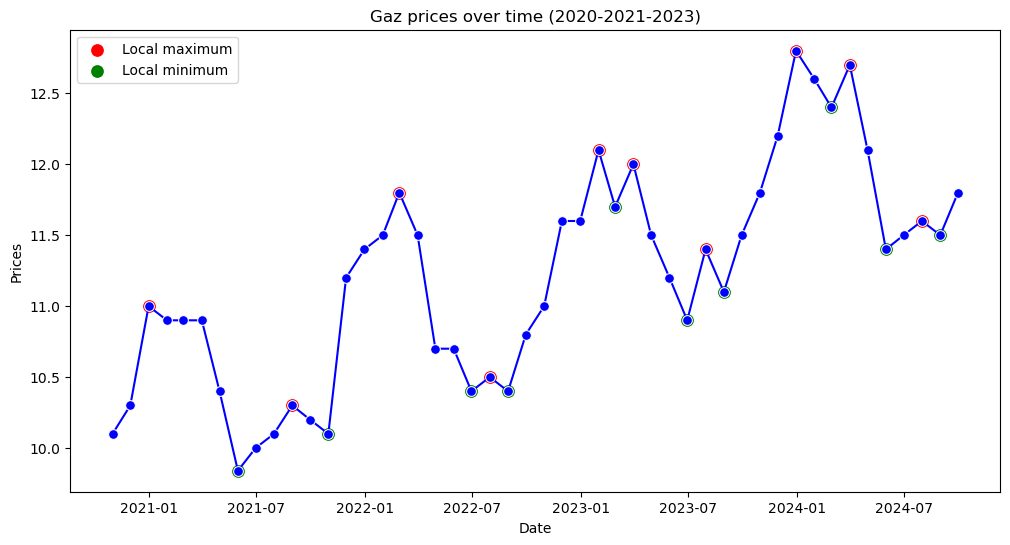

In [5]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Dates', y='Prices', marker='o', markersize=7, color='b')

# Local max
local_maxima = df[(df['Prices'] > df['Prices'].shift(1)) & (df['Prices'] > df['Prices'].shift(-1))]
sns.scatterplot(data=local_maxima, x='Dates', y='Prices', color='r', s=100, label='Local maximum')

# Trouver les minimums locaux
local_minima = df[(df['Prices'] < df['Prices'].shift(1)) & (df['Prices'] < df['Prices'].shift(-1))]
sns.scatterplot(data=local_minima, x='Dates', y='Prices', color='g', s=100, label='Local minimum')

# Ajouter un titre et des labels pour les axes
plt.title('Gaz prices over time (2020-2021-2023)')
plt.xlabel('Date')
plt.ylabel('Prices')

# Afficher la légende
plt.legend()

# Afficher le graphique
plt.show()

Note that there is a small amount data, so it's very hard to make good predictions. Let's try to do it !

To predict the price of gas at any date using scikit-learn, we can try using a regression model. In the context of time series, one common approach is to use linear regression with relevant time characteristics. <br>
To obtain the most accurate model possible, we can consider using more advanced models specifically designed for time series, such as models based on recurrent neural networks (RNN) or ARIMA models. <br> 
We will us an ARIMA models because they are specifically designed for time series and **can capture trends and seasonal patterns**. They are based on the concepts of autoregression (AR) for past time dependencies and moving average (MA) for past prediction errors. <font color='red'>**ARIMA models can be very effective for predicting time series, particularly if our data shows trends and seasons**</font>.

Because of the lack of data, my predictions are far too far off ... So I created a simpler model !

In [19]:
# Train / Test 

X = df[['month', 'year']]  # Utilisez les caractéristiques appropriées pour votre modèle
y = df['Prices']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
# train the model 

model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [23]:
# evaluate the model

y_pred = model.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f'RMSE: {rmse}')
print(f'R2 Score: {r2}')

RMSE: 0.3316624790355396
R2 Score: 0.7708333333333339


Better than linear regression ! 

In [29]:
# Making predictions

date_to_predict = pd.to_datetime('2030-07')
features_to_predict = [[date_to_predict.month, date_to_predict.year]]
predicted_price = model.predict(features_to_predict)

print(f'Prix prédit pour la date {date_to_predict}: {predicted_price[0]}')

Prix prédit pour la date 2030-07-01 00:00:00: 11.6


/Users/augustincablant/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
